**Heart Disease **

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/anjula510/Heart/main/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,exang
0,63,1,3,145,233,1,0,150,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,0.6,2,0,2,1,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,exang
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554,0.326733
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835,0.469794
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [ ]:
#checking the variable type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
 13  exang     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
oldpeak     0
slope       0
ca          0
thal        0
target      0
exang       0
dtype: int64

In [ ]:
#column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'exang'],
      dtype='object')

In [ ]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [ ]:
df['thal'].unique()

array([1, 2, 3, 0])

In [ ]:
df=df.drop(['cp','target','ca','slope','restecg','fbs'], axis=1)
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,thal,exang
0,63,1,145,233,150,2.3,1,0
1,37,1,130,250,187,3.5,2,0
2,41,0,130,204,172,1.4,2,0
3,56,1,120,236,178,0.8,2,0
4,57,0,120,354,163,0.6,2,1


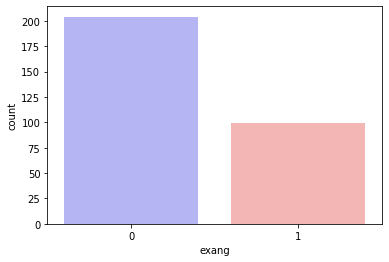

In [ ]:
df.exang.value_counts()
sns.countplot( x="exang",  data=df ,  palette="bwr")
plt.show()

In [ ]:
#dumy values
sex = pd.get_dummies(df['sex'],drop_first=True,prefix='Sex')
thal = pd.get_dummies(df['thal'],drop_first=True,prefix='Thal')

In [ ]:
df= pd.concat([df,sex,thal],axis=1)
df = df.drop(columns =['sex','thal'])
df.head()

,age,trestbps,chol,thalach,oldpeak,exang,Sex_1,Thal_1,Thal_2,Thal_3
0,63,145,233,150,2.3,0,1,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0
2,41,130,204,172,1.4,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0
4,57,120,354,163,0.6,1,0,0,1,0


**Training The Data**

In [ ]:
from sklearn.model_selection import train_test_split
y =df.exang.values
x_data =df.drop(['exang'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.score(x_test, y_test)*100

47.540983606557376

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Random forest accuracy
rf.score(x_test, y_test)*100

75.40983606557377

In [ ]:
y_dtc = dtc.predict(x_test)
y_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test,y_dtc)
cm_rf = confusion_matrix(y_test,y_rf)

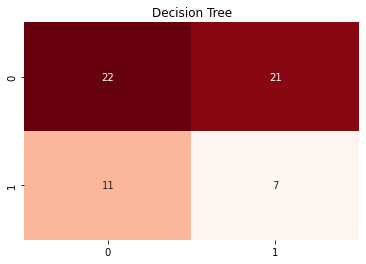

In [ ]:
plt.subplot()
plt.title("Decision Tree")
sns.heatmap(cm_dtc,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show()

<function matplotlib.pyplot.show>

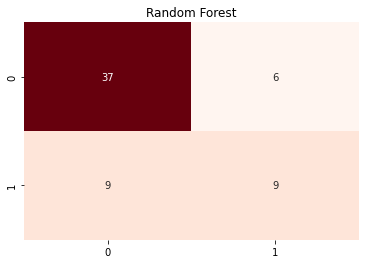

In [ ]:
plt.subplot()
plt.title("Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.show